In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240418_NBFF_NoisyGRU_Final4/max_epochs=500 latent_size=64 seed=0/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT, use_train_dm=True)

# pathDT = pathTT + "20240402_NBFF_LFADS_DT_WDecay_Sweep2/gen_model=GRU_RNN prefix=20240328_NBFF_GRU_Final seed=0 max_epochs=1500 weight_decay=0.001/"
# an_DT = Analysis_DT(run_name = "DT", filepath = pathDT, model_type = "LFADS")

/home/csverst/Github/CtDBenchmark/



Iteration 500/10000
q = 7.37E-03 +/- 3.41E-02
dq = 3.21E-05 +/- 1.37E-04

Iteration 1000/10000
q = 1.64E-03 +/- 8.15E-03
dq = 3.59E-06 +/- 1.92E-05

Iteration 1500/10000
q = 6.88E-04 +/- 3.19E-03
dq = 9.41E-07 +/- 5.14E-06

Iteration 2000/10000
q = 3.88E-04 +/- 1.71E-03
dq = 3.81E-07 +/- 1.88E-06

Iteration 2500/10000
q = 2.48E-04 +/- 1.06E-03
dq = 2.03E-07 +/- 9.83E-07

Iteration 3000/10000
q = 1.69E-04 +/- 7.07E-04
dq = 1.22E-07 +/- 5.69E-07

Iteration 3500/10000
q = 1.20E-04 +/- 4.97E-04
dq = 7.79E-08 +/- 3.53E-07

Iteration 4000/10000
q = 8.82E-05 +/- 3.59E-04
dq = 5.28E-08 +/- 2.38E-07

Iteration 4500/10000
q = 6.60E-05 +/- 2.62E-04
dq = 3.72E-08 +/- 1.68E-07

Iteration 5000/10000
q = 5.01E-05 +/- 1.91E-04
dq = 2.71E-08 +/- 1.22E-07

Iteration 5500/10000
q = 3.83E-05 +/- 1.39E-04
dq = 2.03E-08 +/- 8.96E-08

Iteration 6000/10000
q = 2.95E-05 +/- 1.02E-04
dq = 1.54E-08 +/- 6.61E-08

Iteration 6500/10000
q = 2.28E-05 +/- 7.42E-05
dq = 1.16E-08 +/- 4.74E-08

Iteration 7000/10000
q = 

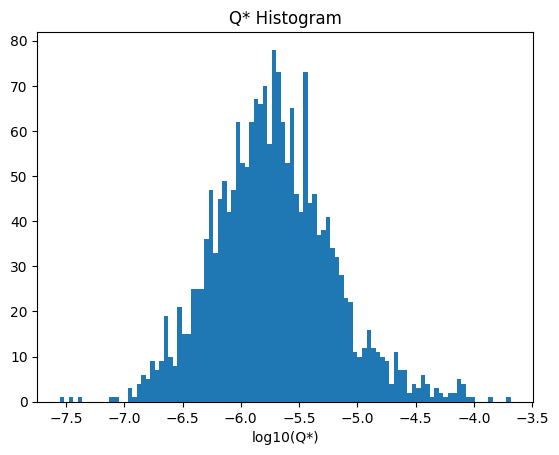

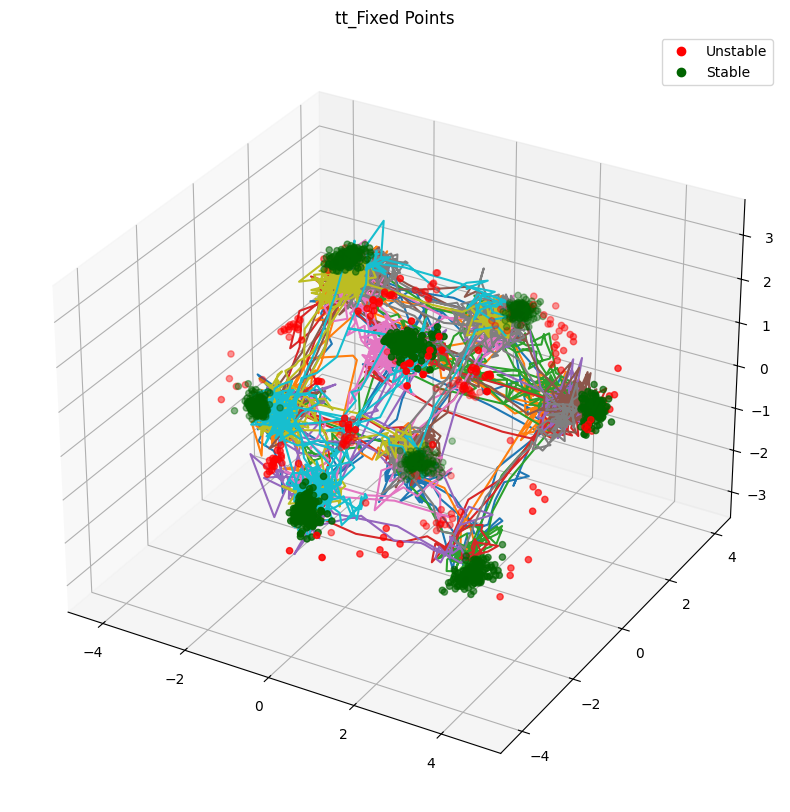

In [3]:
tt_fps = an_TT.plot_fps(
    inputs = torch.zeros(3),
    learning_rate=1e-3,
    noise_scale=0.0,
    n_inits = 2000,
    max_iters=10000,
    device = "cpu",
)

[[ 0.06638305  0.25579792 -0.1378594  ... -0.29191974  0.18519594
   0.16215247]
 [-0.76088864  0.11848489 -0.36453295 ... -0.28182527 -0.6796787
   0.53858423]
 [-0.05622335 -0.00127604  0.14966084 ...  0.60733694  0.2173411
  -0.57376325]
 ...
 [-0.8465787  -0.3928385   0.10036238 ...  0.719776   -0.71890014
   0.30960235]
 [-0.7472036   0.22649749  0.43389687 ... -0.57286733 -0.09077317
   0.01333635]
 [-0.08204911 -0.33563104 -0.3254326  ...  0.70311546 -0.00237091
   0.24286178]]


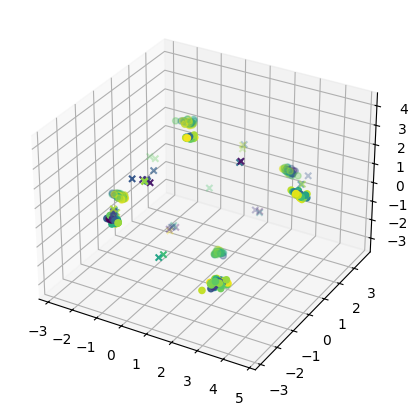

In [6]:
from sklearn.decomposition import PCA

q_thresh = 8e-7
q_flag = tt_fps.qstar < q_thresh

stable= tt_fps.is_stable
stable = stable[q_flag]

isStable = stable == 1
unStable = stable == 0

qstar = tt_fps.qstar
qstar = qstar[q_flag]
x_star = tt_fps.xstar
print(x_star)
x_star = x_star[q_flag, :]
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_star)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[isStable, 0], x_pca[isStable, 1], x_pca[isStable, 2], c=qstar[isStable], cmap='viridis', marker='o', label='Stable')
ax.scatter(x_pca[unStable, 0], x_pca[unStable, 1], x_pca[unStable, 2], c=qstar[unStable], cmap='viridis', marker='x', label='Unstable')


In [5]:
fps_dt = an_DT.plot_fps()

NameError: name 'an_DT' is not defined